<a href="https://colab.research.google.com/github/Agrave1/Food-Sales-Predictions/blob/main/Food_Sales_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
filename = "/content/drive/MyDrive/Portfolio Projects/sales_predictions (1).csv"
sales_df = pd.read_csv(filename)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sales_df.drop(columns = ["Outlet_Size"], inplace = True) 

In [6]:
mean_weight = sales_df["Item_Weight"].mean()
sales_df["Item_Weight"].fillna(mean_weight, inplace = True)

In [7]:
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("LF", "Low Fat")
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("low fat", "Low Fat")
sales_df["Item_Fat_Content"] = sales_df["Item_Fat_Content"].replace("reg", "Regular")

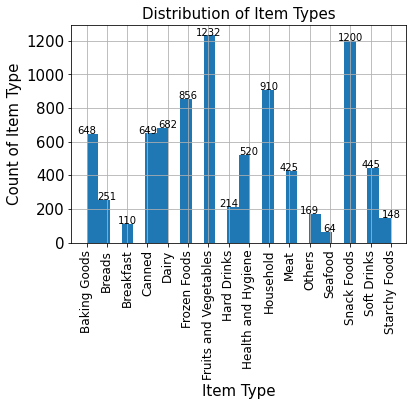

In [8]:
def add_bin_labels(x, y):
  for i in range(len(y)): #https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
    plt.text(i,y[i], y[i], ha = "center")
x = sales_df["Item_Type"].sort_values(ascending = True) #https://stackoverflow.com/questions/43401903/python-order-dataframe-alphabetically
y = sales_df["Item_Type"].value_counts().sort_index(ascending = True) #https://re-thought.com/pandas-value_counts/
x.hist(bins = "auto")
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.xlabel("Item Type", fontsize = 15)
plt.ylabel("Count of Item Type", fontsize = 15)
plt.title("Distribution of Item Types", fontsize = 15)
add_bin_labels(x,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


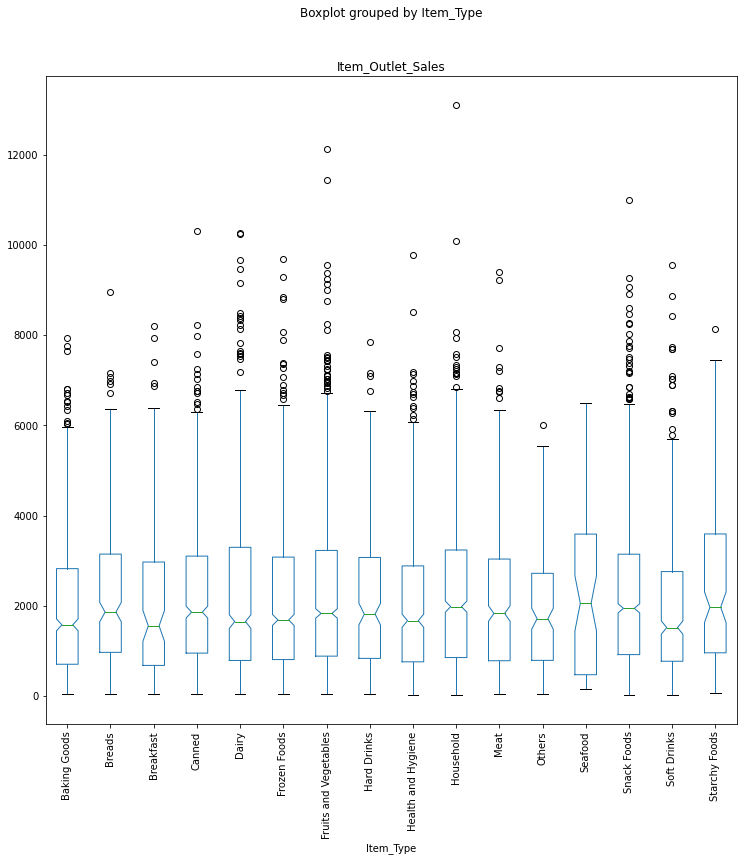

In [15]:
sales_df.boxplot(["Item_Outlet_Sales"],
                 by = "Item_Type",
                 figsize = (12,12),
                 grid = False,
                 notch = True)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


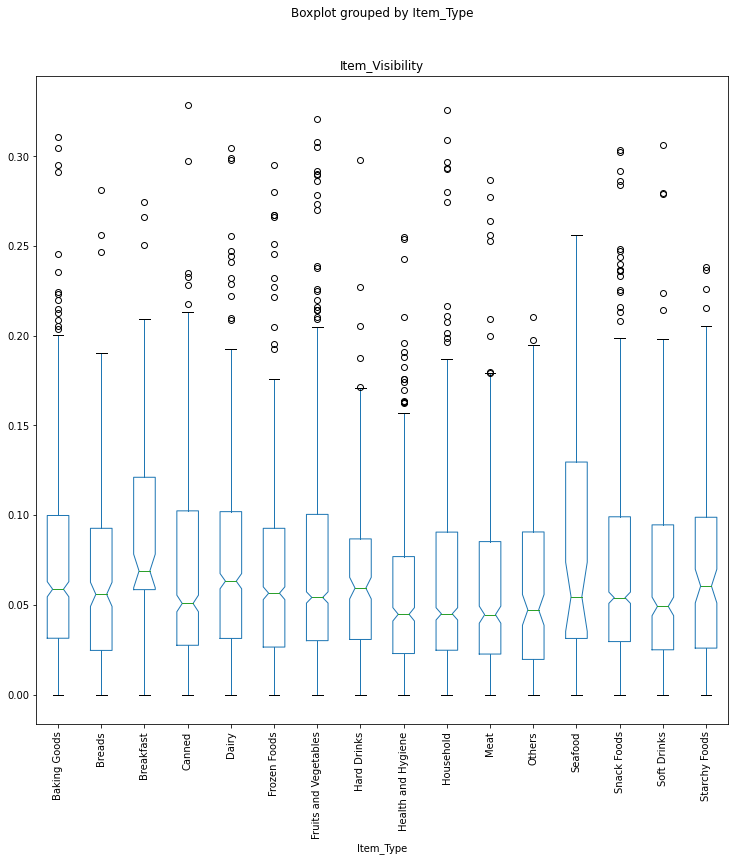

In [13]:
sales_df.boxplot(["Item_Visibility"],
                 by = "Item_Type",
                 figsize = (12,12),
                 grid = False,
                 notch = True)
plt.xticks(rotation = 90)
plt.show()

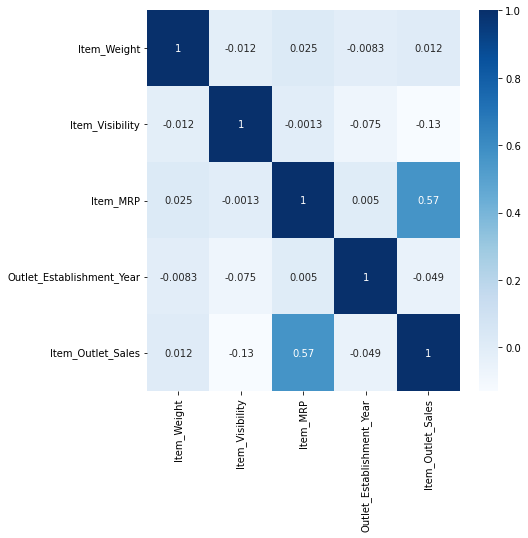

In [11]:
plt.figure(figsize=(7,7))
sns.heatmap(sales_df.corr(), cmap = "Blues", annot = True)
plt.show()